In [42]:
import pandas as pd

data = pd.read_csv('data.csv')

data.head()

,Edibility,Cap-shape,Cap-surface,Cap-color,bruises?,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [43]:
import numpy as np

features = np.array(data.drop(['Edibility'], axis = 1))
labels = np.array(data['Edibility'])

print(features.shape)
print(labels.shape)

(8124, 22)
(8124,)


In [47]:
from sklearn.decomposition import PCA

dummies = pd.get_dummies(data)
X = dummies.values
y = labels

print(X.shape)
print(y.shape)

pca = PCA(n_components = 2)
X_reduced = pca.fit(X).transform(X)
X_reduced = pd.DataFrame(data = X_reduced, columns = ['x', 'y'])
X_reduced.head()

(8124, 119)
(8124,)


,x,y
0,-0.638268,-0.703743
1,-1.573287,0.027375
2,-1.670593,-0.198090
3,-0.744696,-0.410661
4,-1.029175,-0.955341


In [45]:
print('Components:', pca.components_)
print('Explained Variance:', pca.explained_variance_)
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

Components: [[-2.86025077e-01  2.86025077e-01 -2.86384661e-02  4.35582659e-05
   3.77316853e-04  6.15069740e-02 -1.54556242e-03 -3.17438206e-02
  -5.92916682e-02 -1.37911344e-04  2.48346142e-02  3.45949653e-02
  -4.84348721e-03  3.26952000e-04  4.61455010e-02 -2.16972403e-02
   1.31403807e-02 -4.33951386e-03  3.56142443e-05  3.56142443e-05
  -5.32845071e-02  2.44806863e-02  2.47116147e-01 -2.47116147e-01
  -3.29851436e-02 -2.48561865e-03  1.69289402e-01 -3.29851436e-02
   1.83704604e-03 -2.21036665e-01 -8.20809532e-03  6.32871090e-02
   6.32871090e-02 -4.67979840e-03  4.67979840e-03  5.42289289e-02
  -5.42289289e-02 -1.74753170e-01  1.74753170e-01  1.93206849e-01
  -3.33908028e-03  1.99779549e-02  2.60221628e-02 -2.39158373e-02
  -7.36793036e-02 -1.78191551e-03 -2.74445088e-02 -1.20849555e-03
  -3.87689943e-02 -6.84753716e-02 -5.93460173e-04  1.09395274e-02
  -1.09395274e-02  1.74170550e-01 -6.60224043e-02 -4.31869872e-02
  -5.09340893e-02 -1.40270697e-02 -1.89256091e-02  2.16399825e-0

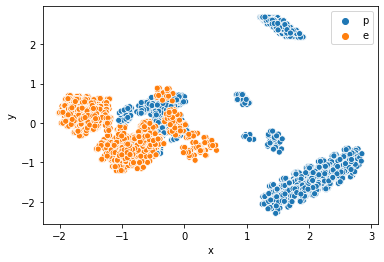

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'x', y = 'y', hue = y, data = X_reduced)